# Objective:

## To predict the price category of a mobile using its features

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("mob_train.csv")

In [3]:
df.shape

(2000, 21)

In [4]:
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Data Preprocessing

In [6]:
# check if any null value is present
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
## no missing values

In [8]:
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [9]:
cat_cols = []
for column in df.columns:
    if len(df[column].unique()) <15:
        cat_cols.append(column)
        print('\n',column)
        print( df[column].unique())


 blue
[0 1]

 dual_sim
[0 1]

 four_g
[0 1]

 m_dep
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]

 n_cores
[2 3 5 6 1 8 4 7]

 three_g
[0 1]

 touch_screen
[0 1]

 wifi
[1 0]

 price_range
[1 2 3 0]


In [10]:
cat_cols.append('ram')
cat_cols.append('int_memory')

In [11]:
df.groupby(['price_range']).mean()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,1116.902,0.486,1.5502,0.500,4.084,0.518,31.174,0.4902,140.552,4.600,9.574,536.408,1150.270,785.314,12.324,5.682,10.612,0.746,0.524,0.496
1,1228.868,0.490,1.4886,0.510,4.340,0.524,32.116,0.5240,140.510,4.298,9.924,666.892,1251.908,1679.490,12.212,5.544,11.362,0.756,0.522,0.504
2,1228.320,0.486,1.5298,0.498,4.498,0.494,30.920,0.4908,143.614,4.682,10.018,632.284,1234.046,2582.816,12.010,5.714,10.972,0.774,0.470,0.504
3,1379.984,0.518,1.5204,0.530,4.316,0.550,33.976,0.5020,136.320,4.502,10.150,744.848,1369.838,3449.232,12.680,6.128,11.098,0.770,0.496,0.524


## Higher the battery_power , internal_memory , pixel_height , ram , Higher the Price

In [12]:
df.groupby(['price_range' , 'four_g']).size()

price_range  four_g
0            0         241
             1         259
1            0         238
             1         262
2            0         253
             1         247
3            0         225
             1         275
dtype: int64

### No  outliers because it's a classification problem 

### Exploratory Data Analysis

In [13]:
## checking the distribution of numerical variables for people who has diabetes

In [14]:
num_cols = []
for column in df.columns:
    if column not in cat_cols:
        num_cols.append(column)
        
print(num_cols)

['battery_power', 'clock_speed', 'fc', 'mobile_wt', 'pc', 'px_height', 'px_width', 'sc_h', 'sc_w', 'talk_time']


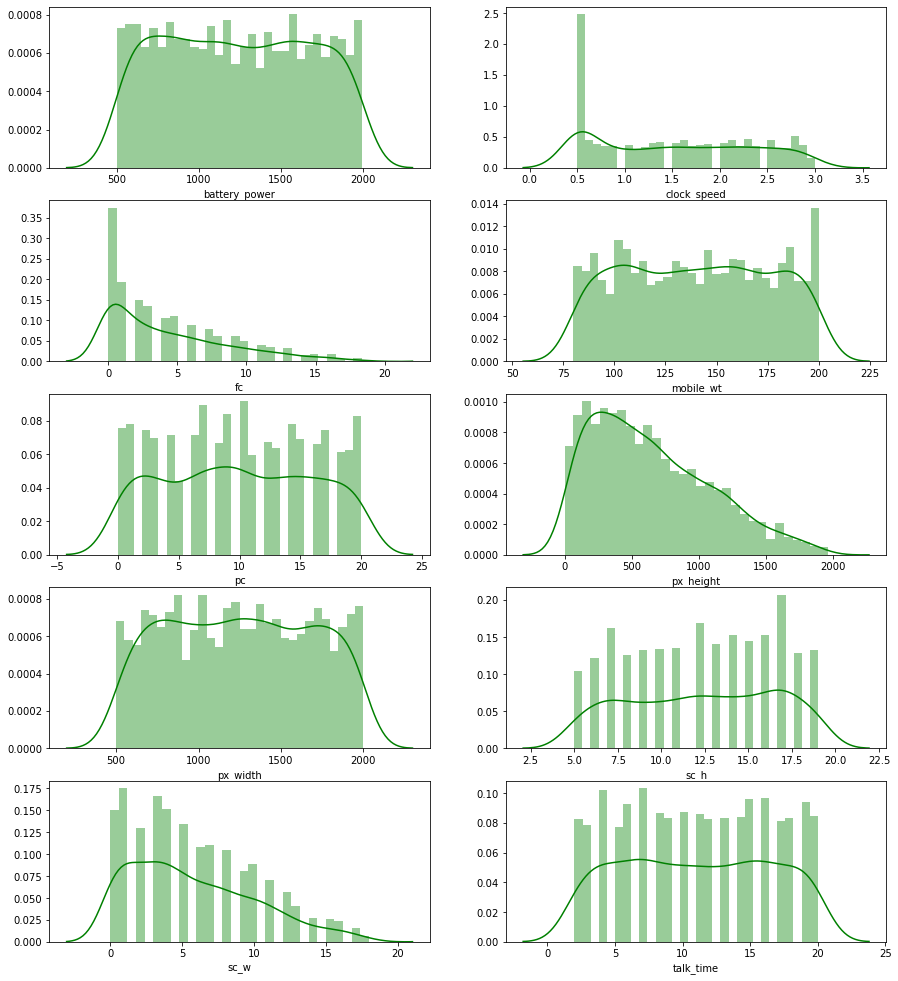

In [15]:
plt.figure(figsize=(15,35))
plotnumber = 1
for numerical_feature in num_cols:
    ax = plt.subplot(10,2,plotnumber)
    sns.distplot(df[numerical_feature] , bins =30 , label = 'Yes' , color = 'green' )
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

In [16]:
## Pair plot

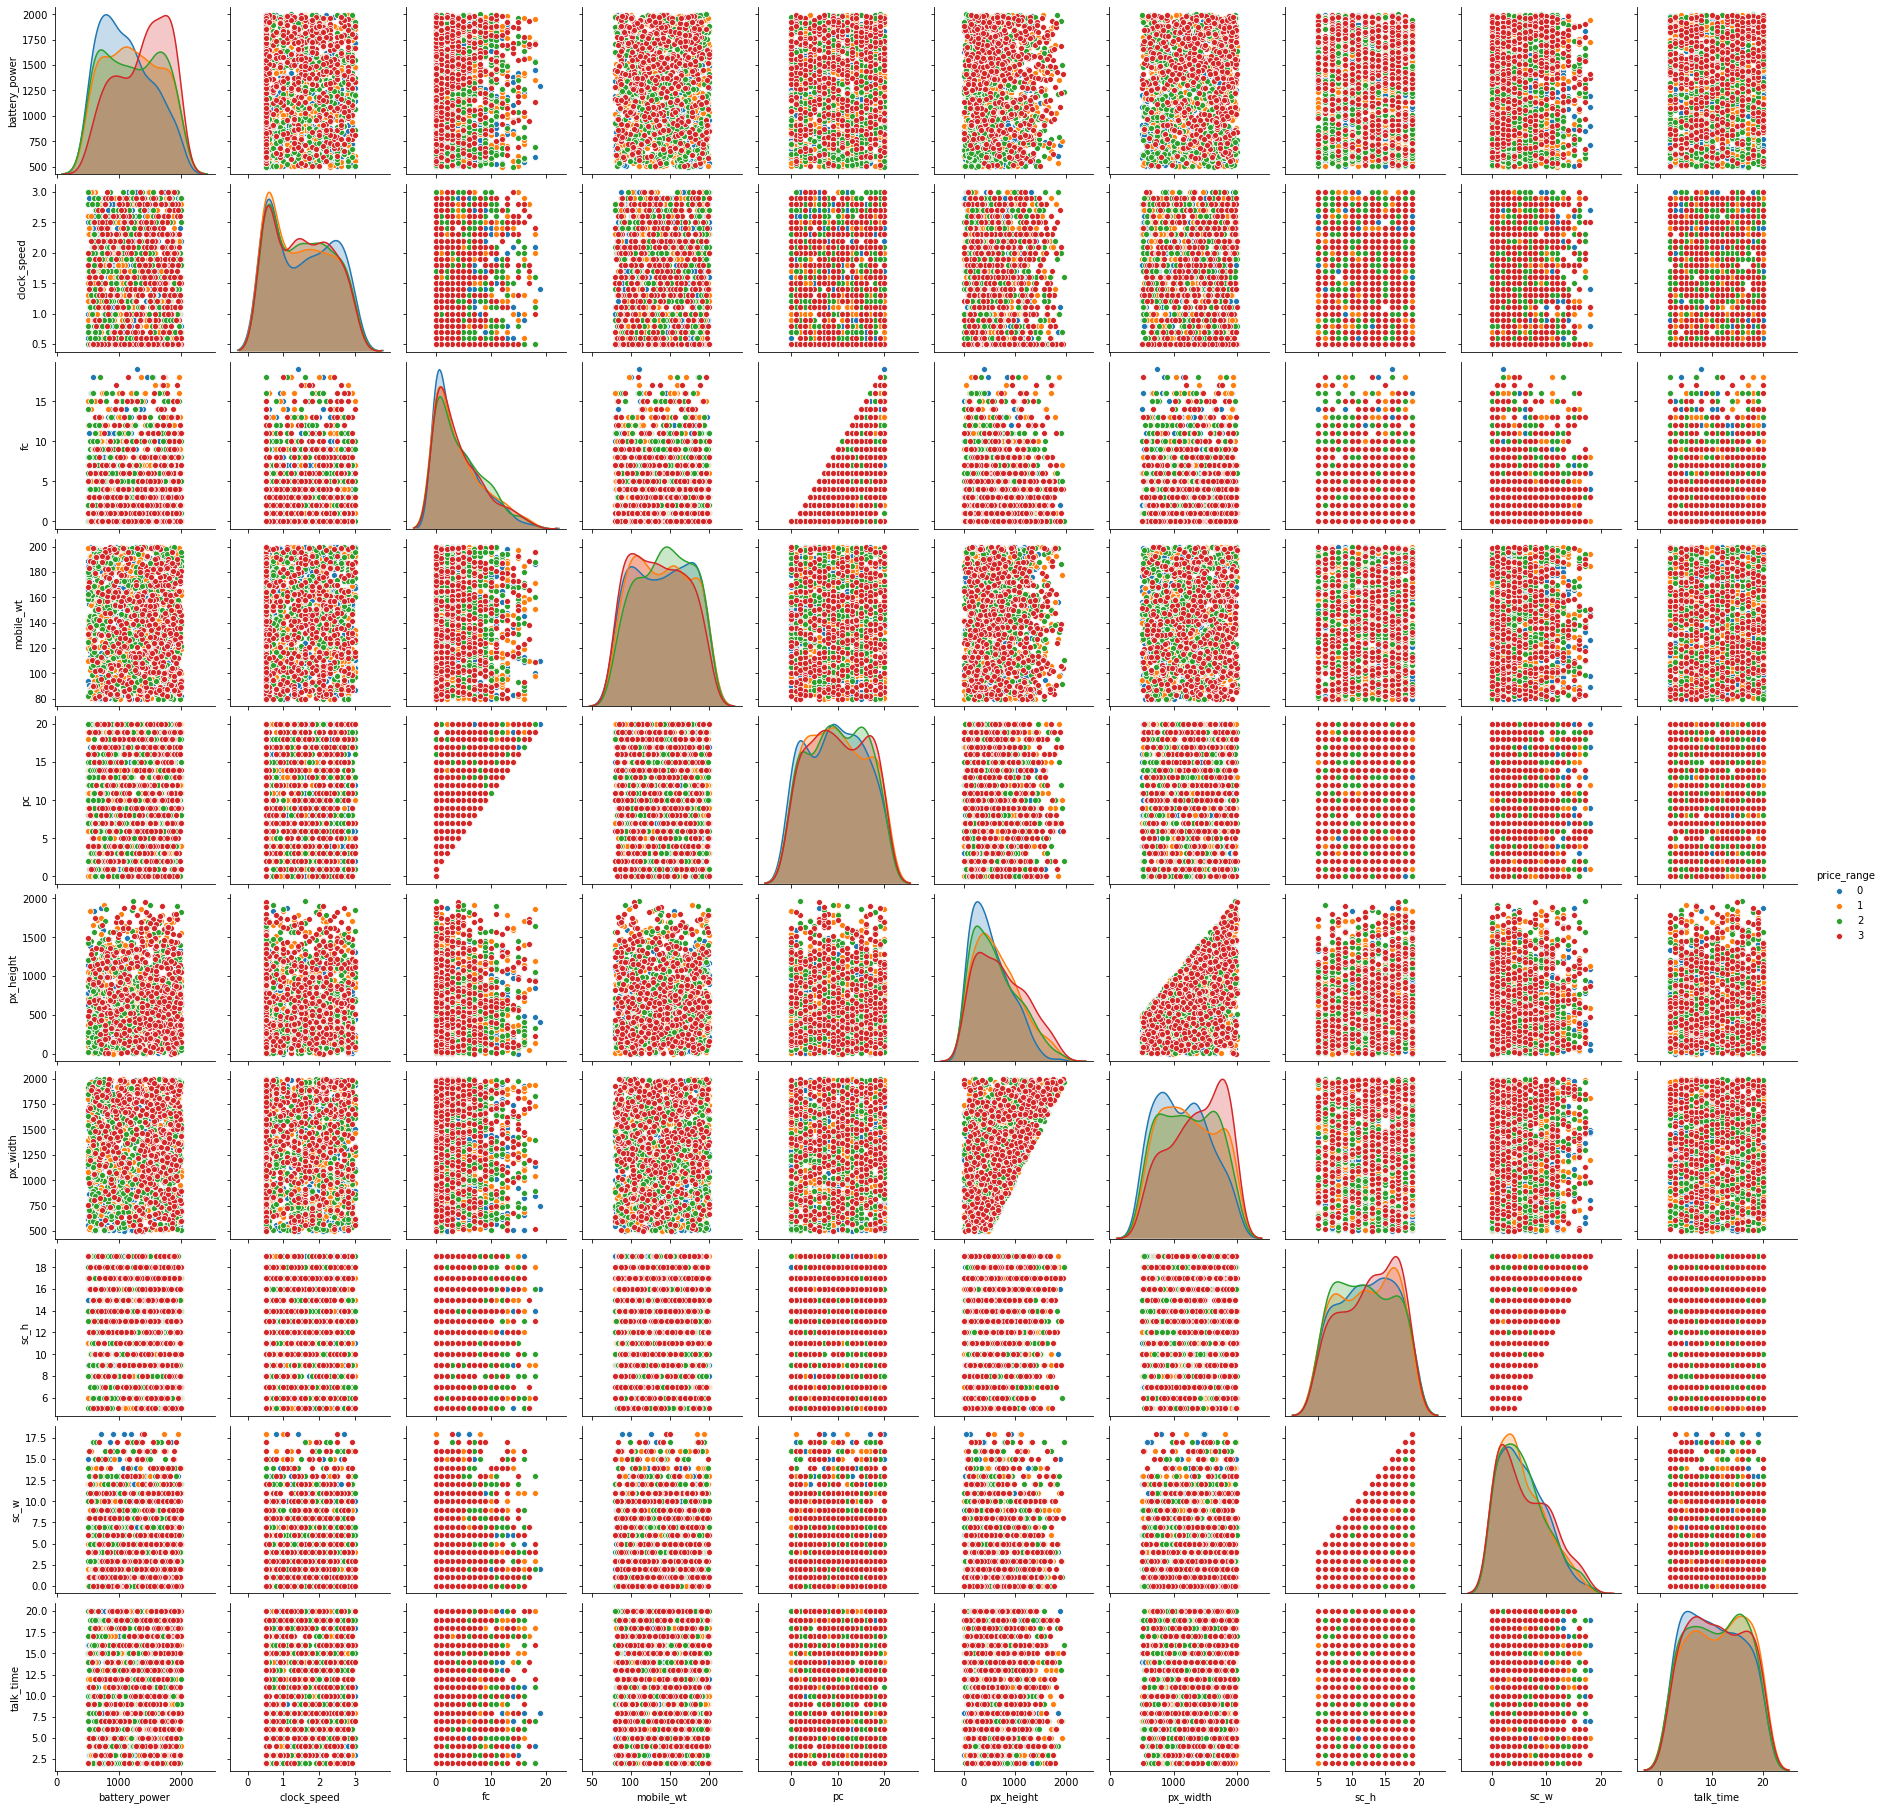

In [17]:
sns.pairplot(df,hue='price_range',vars=['battery_power', 'clock_speed', 'fc', 'mobile_wt', 'pc', 'px_height', 'px_width', 'sc_h', 'sc_w', 'talk_time'])

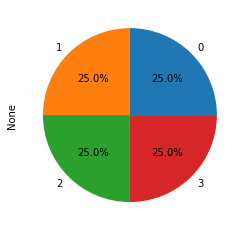

In [18]:
df.groupby('price_range').size().plot(kind='pie', autopct='%.1f%%')

In [19]:
## It is a balanced dataset

In [20]:
cat_cols

['blue',
 'dual_sim',
 'four_g',
 'm_dep',
 'n_cores',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range',
 'ram',
 'int_memory']

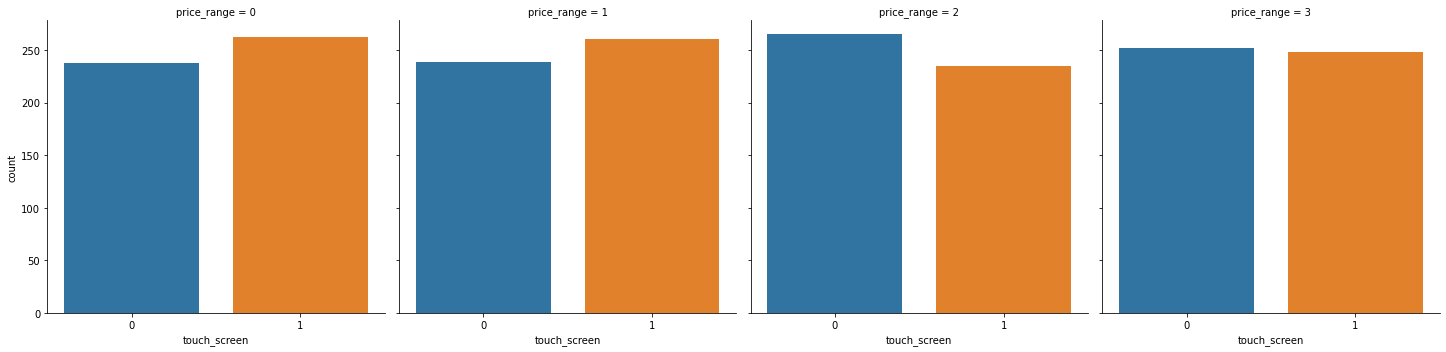

In [21]:
sns.catplot(x='touch_screen' ,col= 'price_range' , kind= 'count' , data = df)

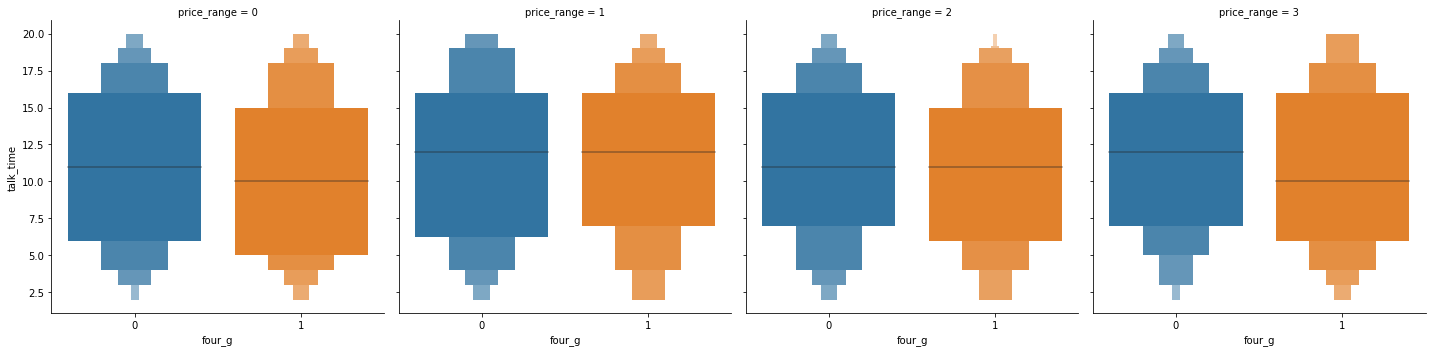

In [22]:
sns.catplot(x='four_g' ,y='talk_time',col= 'price_range' , kind= 'boxen' , data = df)

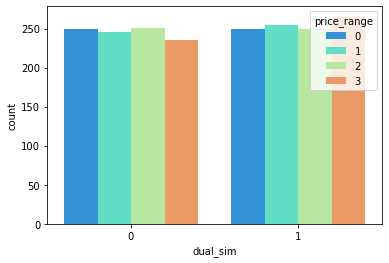

In [23]:
sns.countplot(x='dual_sim',hue= 'price_range',data=df , palette = 'rainbow')

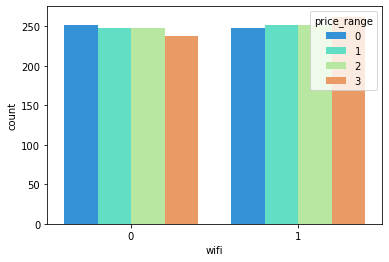

In [24]:
sns.countplot(x='wifi',hue= 'price_range',data=df , palette = 'rainbow')

## Correlation plot

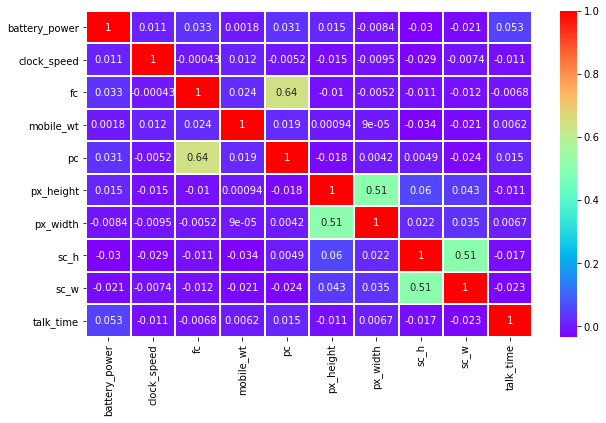

In [25]:
plt.figure(figsize = (10 ,6))
sns.heatmap(df[num_cols].corr(), annot = True , cmap = 'rainbow',linecolor='white',linewidths=1)

In [26]:
df[num_cols].corr()

,battery_power,clock_speed,fc,mobile_wt,pc,px_height,px_width,sc_h,sc_w,talk_time
battery_power,1.000000,0.011482,0.033334,0.001844,0.031441,0.014901,-0.008402,-0.029959,-0.021421,0.052510
clock_speed,0.011482,1.000000,-0.000434,0.012350,-0.005245,-0.014523,-0.009476,-0.029078,-0.007378,-0.011432
fc,0.033334,-0.000434,1.000000,0.023618,0.644595,-0.009990,-0.005176,-0.011014,-0.012373,-0.006829
mobile_wt,0.001844,0.012350,0.023618,1.000000,0.018844,0.000939,0.000090,-0.033855,-0.020761,0.006209
pc,0.031441,-0.005245,0.644595,0.018844,1.000000,-0.018465,0.004196,0.004938,-0.023819,0.014657
px_height,0.014901,-0.014523,-0.009990,0.000939,-0.018465,1.000000,0.510664,0.059615,0.043038,-0.010645
px_width,-0.008402,-0.009476,-0.005176,0.000090,0.004196,0.510664,1.000000,0.021599,0.034699,0.006720
sc_h,-0.029959,-0.029078,-0.011014,-0.033855,0.004938,0.059615,0.021599,1.000000,0.506144,-0.017335
sc_w,-0.021421,-0.007378,-0.012373,-0.020761,-0.023819,0.043038,0.034699,0.506144,1.000000,-0.022821
talk_time,0.052510,-0.011432,-0.006829,0.006209,0.014657,-0.010645,0.006720,-0.017335,-0.022821,1.000000


In [27]:
### pc and fc are having moderate positive correlation similarly px_height and px_width also

In [28]:
df = df.drop(['fc' , 'px_width'] , axis = 1)

# Feature Engineering

# Scaling using MinMaxScaler

In [29]:
x=df.iloc[:,:-1]
y=df['price_range']

In [30]:
from sklearn.preprocessing import MinMaxScaler
sclr = MinMaxScaler()
x = pd.DataFrame(sclr.fit_transform(x) , columns = x.columns)

In [31]:
x.head()

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0


# Feature Selection

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [33]:
### Apply SelectKBest Algorithm
rank_features=SelectKBest(score_func=chi2)
ordered_feature=rank_features.fit(x,y)

In [35]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(x.columns)

In [36]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,battery_power,15.850605
1,blue,0.723232
2,clock_speed,0.386197
3,dual_sim,0.631011
4,four_g,1.521572
5,int_memory,1.545470
6,m_dep,1.034958
7,mobile_wt,1.861732
8,n_cores,1.668817
9,pc,0.459303


In [37]:
a = features_rank.nlargest(15,'Score')
a

,Features,Score
11,ram,282.971271
0,battery_power,15.850605
10,px_height,8.858964
16,touch_screen,1.928429
7,mobile_wt,1.861732
8,n_cores,1.668817
5,int_memory,1.545470
4,four_g,1.521572
12,sc_h,1.156754
6,m_dep,1.034958


In [38]:
top_features = []
for col_names in a.Features:
    top_features.append(col_names)
    
print(top_features)

['ram', 'battery_power', 'px_height', 'touch_screen', 'mobile_wt', 'n_cores', 'int_memory', 'four_g', 'sc_h', 'm_dep', 'sc_w', 'talk_time', 'blue', 'dual_sim', 'pc']


In [39]:
x = x[top_features]

### TRAIN TEST SPLIT

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

## Model Building

## RandomForestClassifier with hyperparameter optimization

In [41]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt','log2']

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]

min_samples_leaf = [1, 2, 4,6,8]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [42]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                               random_state=100,)

### fit the randomized model

rf_randomcv.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100)

In [43]:
random_forest_model = rf_randomcv.best_estimator_

In [44]:
from sklearn import metrics

In [45]:
predict_train_data = random_forest_model.predict(x_test)

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.843


Text(0.5, 15.0, 'predicted label')

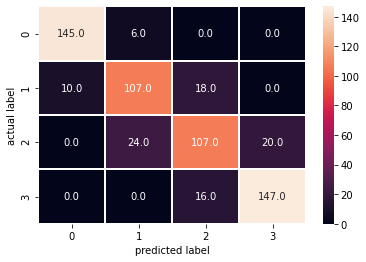

In [46]:
sns.heatmap(metrics.confusion_matrix(y_test , predict_train_data ) , annot = True,fmt=".1f",linecolor='white',linewidths=1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

## Hyper Parameter Optimization with xgboost

In [47]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [48]:
import xgboost

In [49]:
classifier=xgboost.XGBClassifier()

In [50]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [51]:
random_search.fit(x_train,y_train.ravel())

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   14.1s finished


[13:52:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [52]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [54]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x_test,y_test.ravel(),cv=10)

[13:52:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:52:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:52:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or 

In [55]:
score

array([0.86666667, 0.75      , 0.8       , 0.83333333, 0.83333333,
       0.8       , 0.88333333, 0.81666667, 0.81666667, 0.8       ])

In [56]:
score.mean()

0.82

Text(0.5, 15.0, 'predicted label')

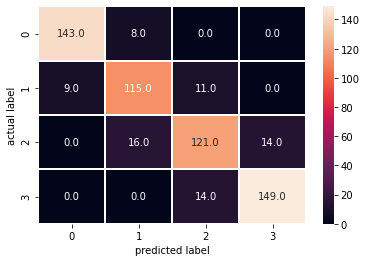

In [57]:
sns.heatmap(metrics.confusion_matrix(y_test , random_search.predict(x_test) ) , annot = True,fmt=".1f",linecolor='white',linewidths=1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

## Logistic Regression

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid = {"C":np.logspace(-3,3,7), "penalty":["l2"]}

In [59]:
logreg     = LogisticRegression(multi_class = 'multinomial')
logreg_cv  = GridSearchCV(logreg,grid,cv=10)

logreg_cv.fit(x_train,y_train)
print("\ntuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("\naccuracy :",logreg_cv.best_score_)
print('\n' ,metrics.classification_report(y_test, logreg_cv.predict(x_test)))


tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}

accuracy : 0.9

               precision    recall  f1-score   support

           0       0.95      0.96      0.96       151
           1       0.88      0.87      0.88       135
           2       0.86      0.86      0.86       151
           3       0.93      0.93      0.93       163

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



Text(0.5, 15.0, 'predicted label')

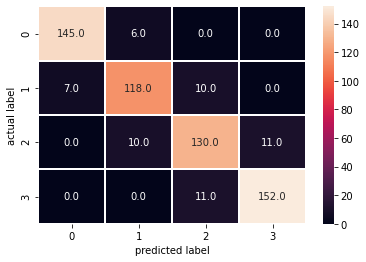

In [60]:
sns.heatmap(metrics.confusion_matrix(y_test , logreg_cv.predict(x_test) ) , annot = True,fmt=".1f",linecolor='white',linewidths=1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

# LGBM

In [61]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(x_train , y_train)

LGBMClassifier()

In [62]:
y_pred = lgbm.predict(x_test)
print('accuracy_score is :{}'.format(metrics.accuracy_score(y_test , y_pred) ))

print('\n' ,metrics.classification_report(y_test,y_pred))

accuracy_score is :0.8833333333333333

               precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.85      0.87      0.86       135
           2       0.81      0.81      0.81       151
           3       0.91      0.90      0.90       163

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



Text(0.5, 15.0, 'predicted label')

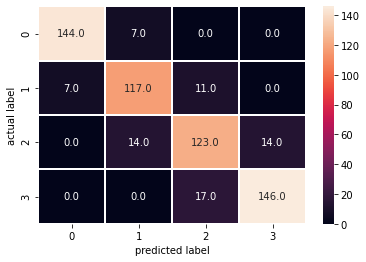

In [63]:
sns.heatmap(metrics.confusion_matrix(y_test , y_pred ) , annot = True,fmt=".1f",linecolor='white',linewidths=1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

## Conclusion

###  Logistic Regression gives high precision , recall and f1 scores when compared to other algorithm models ,
###  hence it is a better model 